<a href="https://colab.research.google.com/github/UzraIsmat/UzraIsmat/blob/main/Uzra_TargetProductRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1 : Mounting GDrive to Access Dataset**

In [216]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Step 2 : Importing all Libraries that might be utilized**

In [217]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import gzip
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from datetime import datetime
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
import dask.bag as db
from sklearn.naive_bayes import GaussianNB

In [218]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Step 3 : Accessing Dataset**

Importing the dataset and converting it into a dataframe. **bold text**

In [219]:
products = pd.read_excel('/content/drive/MyDrive/Target_Dataset.xlsx')
products = pd.DataFrame(products)

**Checking the first 10 rows to gain info about the contents**


In [220]:
products.head(10)

,product,source,categories,date,didPurchase,doRecommend,rating,reviews,title
0,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",2021-01-13T00:00:00.000Z,NaN,1.0,5.0,This product so far has not disappointed. My c...,brand name
1,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",2021-01-13T00:00:00.000Z,NaN,1.0,5.0,great for beginner or experienced person. Boug...,very fast
2,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",2021-01-13T00:00:00.000Z,NaN,1.0,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",2021-01-13T00:00:00.000Z,NaN,1.0,4.0,I've had my XYZ brand HD 8 two weeks now and I...,Good!!!
4,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",2021-01-12T00:00:00.000Z,NaN,1.0,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids
5,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",2021-01-12T00:00:00.000Z,NaN,1.0,5.0,This Target XYZ brand 8 inch tablet is the per...,Just what we expected
6,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",2021-01-12T00:00:00.000Z,NaN,1.0,4.0,"Great for e-reading on the go, nice and light ...",great e-reader tablet
7,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",2021-01-12T00:00:00.000Z,NaN,1.0,5.0,"I gave this as a Christmas gift to my inlaws, ...",Great for gifts
8,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",2021-01-23T00:00:00.000Z,NaN,1.0,5.0,Great as a device to read books. I like that i...,Great for reading
9,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",2021-01-23T00:00:00.000Z,NaN,1.0,5.0,I love ordering books and reading them with th...,Great and lightweight reader


**Data row count**

In [221]:
products.shape

(34660, 9)

**Distribution of the data**

In [222]:
products.describe()

,didPurchase,doRecommend,rating
count,1.0,34066.000000,34627.000000
mean,1.0,0.959373,4.584573
std,NaN,0.197427,0.735653
min,1.0,0.000000,1.000000
25%,1.0,1.000000,4.000000
50%,1.0,1.000000,5.000000
75%,1.0,1.000000,5.000000
max,1.0,1.000000,5.000000


**Types of the data present**

In [223]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product      27900 non-null  object 
 1   source       34660 non-null  object 
 2   categories   34660 non-null  object 
 3   date         34621 non-null  object 
 4   didPurchase  1 non-null      float64
 5   doRecommend  34066 non-null  float64
 6   rating       34627 non-null  float64
 7   reviews      34658 non-null  object 
 8   title        34655 non-null  object 
dtypes: float64(3), object(6)
memory usage: 2.4+ MB


**Columns in our dataframe**

In [224]:
products.columns

Index(['product', 'source', 'categories', 'date', 'didPurchase', 'doRecommend',
       'rating', 'reviews', 'title'],
      dtype='object')

# **Step 4 : Checking for missing data**

In [225]:
total = products.isnull().sum().sort_values(ascending=False)
percent = (products.isnull().sum()/products.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
didPurchase,34659,0.999971
product,6760,0.195038
doRecommend,594,0.017138
date,39,0.001125
rating,33,0.000952
title,5,0.000144
reviews,2,0.000058
source,0,0.000000
categories,0,0.000000


**From the above step we can see that the column 'didPurchase' has the most missing values.**

# **Step 5 : Dealing with missing data**

**We will drop the didPurchase column as it has 99% of data values missing and hence is of no significance to us and also the date column.**

In [226]:
products = products.drop(['didPurchase'], axis= 1)
products = products.drop(['date'], axis= 1)

**We will drop the empty rows in product, title and reviews columns as very few values of data are missing and removing these rows will not impact much on our results.**

In [227]:
products = products.dropna(subset=['title'])
products = products.dropna(subset=['product'])
products = products.dropna(subset=['reviews'])

**Next we will fill the missing values in rating column using mean and doRecommend column with 1 or 0 based on rating.**

In [228]:
products['rating'].fillna((products['rating'].mean()), inplace=True)
products.loc[products.doRecommend.isnull(),'doRecommend'] = products['rating'].apply(lambda x: 0 if x < 2.5 else 1)

**Checking again for missing data**

In [229]:
total = products.isnull().sum().sort_values(ascending=False)
percent = (products.isnull().sum()/products.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
product,0,0.0
source,0,0.0
categories,0,0.0
doRecommend,0,0.0
rating,0,0.0
reviews,0,0.0
title,0,0.0


**From above we can see that our data frame has no more missing values in it. So lets check using .head() whether our changes have been done or not**

In [230]:
products.head(10)

,product,source,categories,doRecommend,rating,reviews,title
0,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",1.0,5.0,This product so far has not disappointed. My c...,brand name
1,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",1.0,5.0,great for beginner or experienced person. Boug...,very fast
2,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",1.0,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",1.0,4.0,I've had my XYZ brand HD 8 two weeks now and I...,Good!!!
4,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",1.0,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids
5,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",1.0,5.0,This Target XYZ brand 8 inch tablet is the per...,Just what we expected
6,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",1.0,4.0,"Great for e-reading on the go, nice and light ...",great e-reader tablet
7,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",1.0,5.0,"I gave this as a Christmas gift to my inlaws, ...",Great for gifts
8,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",1.0,5.0,Great as a device to read books. I like that i...,Great for reading
9,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",1.0,5.0,I love ordering books and reading them with th...,Great and lightweight reader


In [231]:
products.shape

(27895, 7)

In [232]:
products.describe()

,doRecommend,rating
count,27895.000000,27895.000000
mean,0.957232,4.565050
std,0.202336,0.742348
min,0.000000,1.000000
25%,1.000000,4.000000
50%,1.000000,5.000000
75%,1.000000,5.000000
max,1.000000,5.000000


In [233]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27895 entries, 0 to 27899
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product      27895 non-null  object 
 1   source       27895 non-null  object 
 2   categories   27895 non-null  object 
 3   doRecommend  27895 non-null  float64
 4   rating       27895 non-null  float64
 5   reviews      27895 non-null  object 
 6   title        27895 non-null  object 
dtypes: float64(2), object(5)
memory usage: 2.7+ MB


In [234]:
products.columns

Index(['product', 'source', 'categories', 'doRecommend', 'rating', 'reviews',
       'title'],
      dtype='object')

**So the new column count is 7 and our dataframe is free of any missing values**

# **Step 5 : Products**

**First let us check how many types of products are available in our dataframe.**

In [235]:
len(products['product'].unique())

60

**We can se that there are 60 types of products, so next we will find out their names.**

In [236]:
for i in products['product'].unique():
  print(i)

electronics brand product name Tablet A 10.1 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta
brand name Oasis E-reader with Leather Charging Cover - Merlot, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers,,
retail brand brand name Lighted Leather Cover,,,
retail brand brand name Lighted Leather Cover,,,
retail brand brand name Lighted Leather Cover,,,_x000D_
retail brand brand name Lighted Leather Cover,,,
retail brand brand name Lighted Leather Cover,,,_x000D_
brand name Keyboard,,,
brand name Keyboard,,,_x000D_
brand name Keyboard,,,
electronics brand product name Tablet A 10.1 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta
XYZ brand HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Tangerine - with Special Offers,
retail brand 5W USB Official OEM Charger and Power Adapter for XYZ brand Tablets and brand name eReaders,,,
retail brand 5W USB Official OEM Charger and Power Adapter for XYZ brand Tablets and brand name eReaders

# **Step 6 : Dealing with Rating and Recommendation**

**Classify ratings and Printing rates and their total numbers**

In [237]:
good_rate = len(products[products['rating'] >= 3])
bad_rate = len(products[products['rating'] < 3])
print ('Good ratings : {} reviews for products'.format(good_rate))
print ('Bad ratings : {} reviews for products'.format(bad_rate))

Good ratings : 27230 reviews for products
Bad ratings : 665 reviews for products


**Applying the new classification to the ratings column**

In [238]:
products['rating_class'] = products['rating'].apply(lambda x: 'bad' if x < 3 else 'good')

**Classify Recommendation and Printing rates and their total numbers**

In [239]:
recommended = len(products[products['doRecommend'] >= 1])
notRecommended= len(products[products['doRecommend'] < 1])
print ('Recommendation : {} reviews for products'.format(recommended))
print ('No Recommendation : {} reviews for products'.format(notRecommended))

Recommendation : 26702 reviews for products
No Recommendation : 1193 reviews for products


**Apply the new classification to the doRecommend column**

In [240]:
products['doRecommend_class'] = products['doRecommend'].apply(lambda x: 'No' if x == 0 else 'Yes')

In [241]:
products.head()

,product,source,categories,doRecommend,rating,reviews,title,rating_class,doRecommend_class
0,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",1.0,5.0,This product so far has not disappointed. My c...,brand name,good,Yes
1,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",1.0,5.0,great for beginner or experienced person. Boug...,very fast,good,Yes
2,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",1.0,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,good,Yes
3,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",1.0,4.0,I've had my XYZ brand HD 8 two weeks now and I...,Good!!!,good,Yes
4,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",1.0,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,good,Yes


**From above we can see that people have not recommended certain products even after giving good reviews about it.**

**Average Rating Score**

In [242]:
print ("Average rating score: ",round(products.rating.mean(),3))

Average rating score:  4.565


**Average Recommendation Score**

In [243]:
print ("Average Recommendation score: ",round(products.doRecommend.mean(),3))

Average Recommendation score:  0.957


**Statistic Summary of Ratings**

In [244]:
products[['rating']].describe()

,rating
count,27895.000000
mean,4.565050
std,0.742348
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Plot Distribution for Rating**

In [245]:
products.groupby('rating').size()

rating
1.00000      326
2.00000      339
3.00000     1289
4.00000     7220
4.56505       32
5.00000    18689
dtype: int64

**From above we can conclude that the maximum number of rating score is 5**

# **Step 7 : Some EDA**

Text(0, 0.5, 'Number of Reviews')

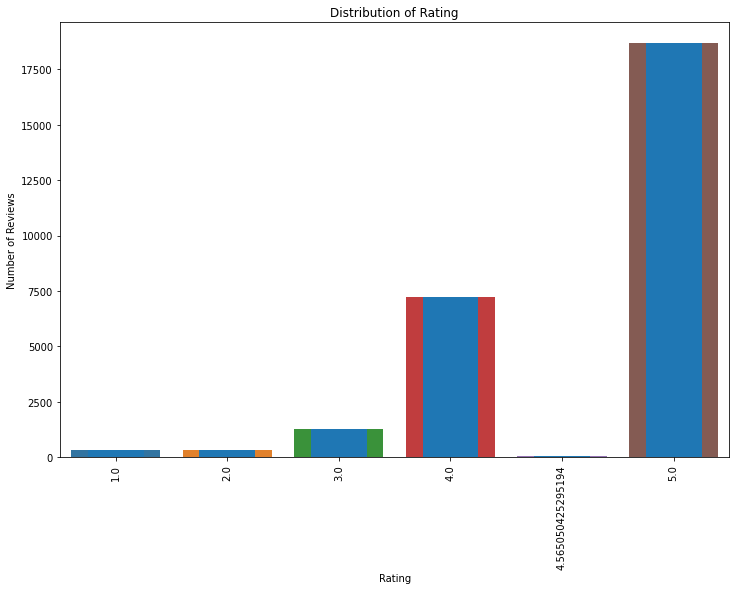

In [246]:
plt.figure(figsize=(12,8))
sns.countplot(products['rating'])
products['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

In [247]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [248]:
categories=[]
for category in products.categories:
    
    x=category.split(',')
    for i in x:
         if i not in categories:
            categories.append(str(i))
categories=str(categories)    

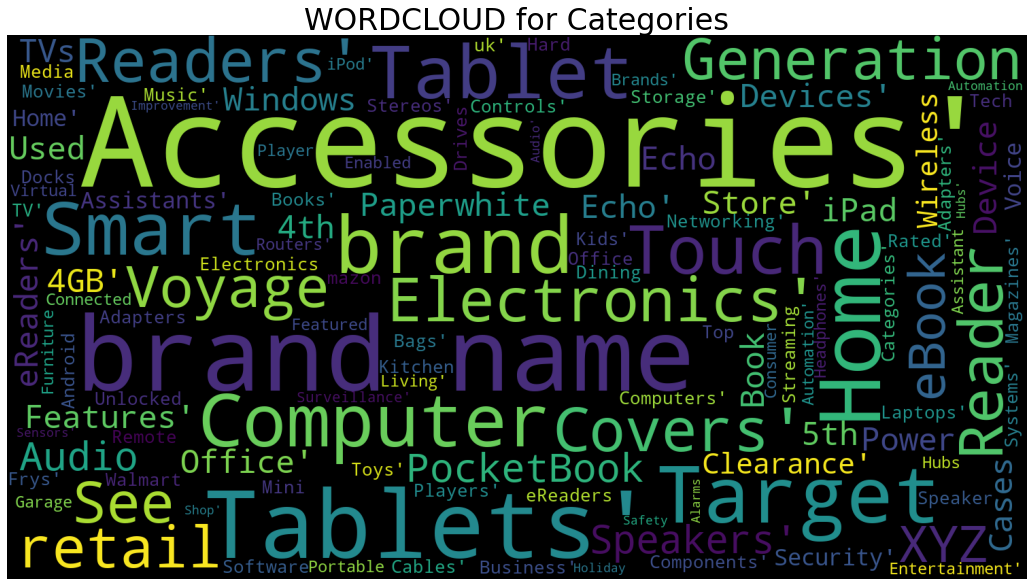

In [249]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2,min_word_length=3).generate(categories)
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Categories',fontsize=30)
plt.imshow(wordcloud_genre)

In [250]:
products1=products.groupby(['product'])[['rating']].sum()
high_rated=products1.nlargest(20,'rating')
high_rated.head()

,rating
product,
"XYZ brand Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta",48830.260202
"retail brand brand name Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,",15102.000000
"electronics brand product name Tablet A 10.1 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",12907.000000
"retail brand XYZ brand Tv,,,_x000D_\nretail brand XYZ brand Tv,,,",11741.000000
electonics brand Home_x000D_\nelectonics brand Home,9856.000000


<BarContainer object of 20 artists>

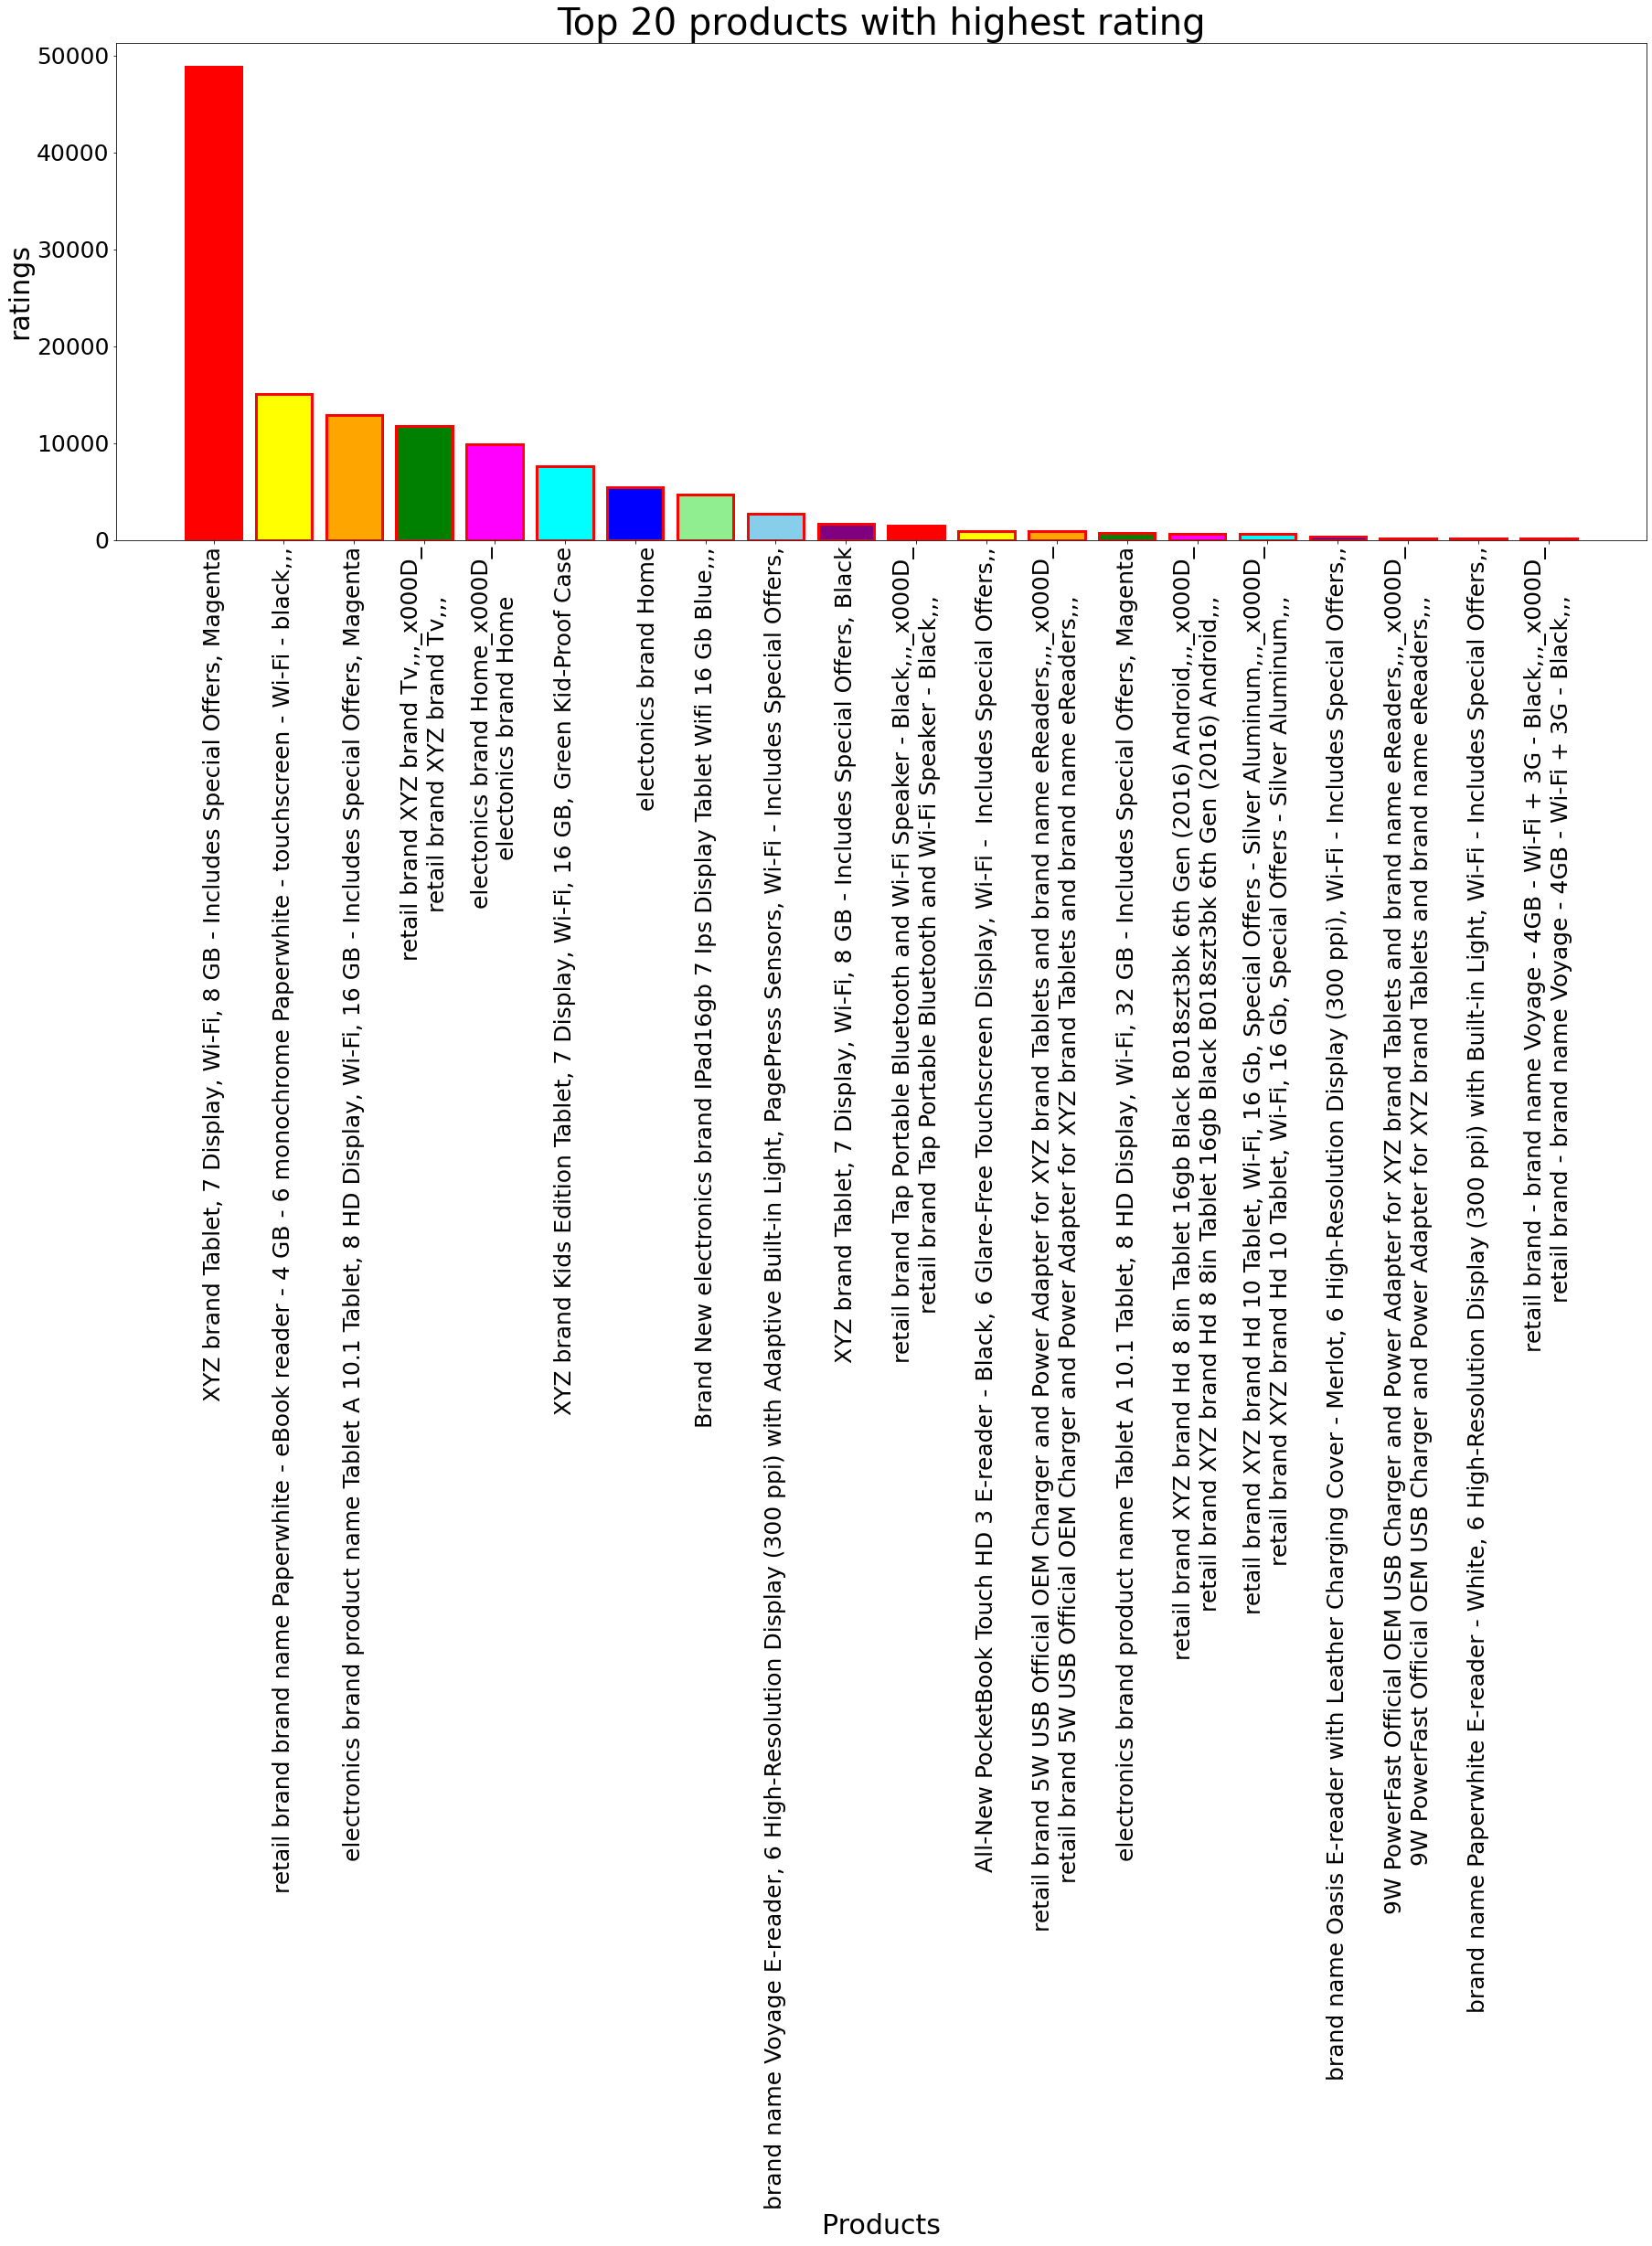

In [251]:
plt.figure(figsize=(30,10))
plt.title('Top 20 products with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('Products',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='red',color=colors)

In [252]:
products[['rating','doRecommend']].describe()

,rating,doRecommend
count,27895.000000,27895.000000
mean,4.565050,0.957232
std,0.742348,0.202336
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


# **Step 8 : Reviews**

In [253]:
import re, string, unicodedata
import nltk
import contractions
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from contractions import contractions_dict

**Lowering the case in review text**

In [254]:
products['reviews'] = products['reviews'].str.lower()

**Removing the punctuations**

In [255]:
products['reviews'] = products['reviews'].apply(lambda x: re.sub('[^a-z A-Z 0-9-]+', '', x))  

**Removing stopwords**

In [256]:
from spacy.lang.en.stop_words import STOP_WORDS
products['reviews'] = products['reviews'].apply(lambda x: " ".join([i for i in x.split() if i not in STOP_WORDS]) )

**Removing url and tags**

In [257]:
products['reviews'] = products['reviews'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))

**Removing html tags**

In [258]:
products['reviews'] = products['reviews'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

**Spelling corrections**

In [259]:
#from textblob import TextBlob 
#products['reviews'] = products['reviews'].apply(lambda x: TextBlob(x).correct())

**Removing emails**

In [260]:
 products['reviews'] = products['reviews'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', '', x))

**Removing extra spaces**

In [261]:
products['reviews'] = products['reviews'].apply(lambda x: " ".join(x.split()))

In [262]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

**Lemmatizer**

In [263]:
%time
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

products['reviews'] = products['reviews'].apply(lambda text: lemmatize_words(text))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs


In [264]:
products.head()

,product,source,categories,doRecommend,rating,reviews,title,rating_class,doRecommend_class
0,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",1.0,5.0,product far disappointed child love use like a...,brand name,good,Yes
1,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",1.0,5.0,great beginner experienced person bought gift ...,very fast,good,Yes
2,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",1.0,5.0,inexpensive tablet use learn step thrilled lea...,Beginner tablet for our 9 year old son.,good,Yes
3,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",1.0,4.0,ive xyz brand hd 8 week love tablet great valu...,Good!!!,good,Yes
4,electronics brand product name Tablet A 10.1 T...,Target,"Electronics,iPad & Tablets,All Tablets,XYZ bra...",1.0,5.0,bought grand daughter come visit set user ente...,Fantastic Tablet for kids,good,Yes


# **Step 9 : Splitting Data and Model Building**

In [265]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(products['reviews'], products['rating_class'], test_size = 0.3)

**Model Building**

In [266]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

In [267]:
X = products['reviews']
y = products['rating_class']

In [268]:
fit_model = clf.fit(xtrain,ytrain)

In [269]:
y_pred = clf.predict(xtest)

In [270]:
print('Training accuracy:', fit_model.score(xtrain,ytrain))
print('Test accuracy:', fit_model.score(xtest,ytest))

Training accuracy: 0.9769538051828331
Test accuracy: 0.973951487632931


In [271]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest,y_pred))

print(confusion_matrix(ytest,y_pred))

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00       217
        good       0.97      1.00      0.99      8152

    accuracy                           0.97      8369
   macro avg       0.49      0.50      0.49      8369
weighted avg       0.95      0.97      0.96      8369

[[   0  217]
 [   1 8151]]


In [272]:
products['reviews'][:5]

0    product far disappointed child love use like a...
1    great beginner experienced person bought gift ...
2    inexpensive tablet use learn step thrilled lea...
3    ive xyz brand hd 8 week love tablet great valu...
4    bought grand daughter come visit set user ente...
Name: reviews, dtype: object

In [273]:
from keras.preprocessing.text import Tokenizer

samples = X
tokenizer = Tokenizer(lower=True, split=' ') # creates tokenizer
tokenizer.fit_on_texts(samples)  # builds the word index
sequences = tokenizer.texts_to_sequences(samples) #turns strings into list of integers
# word_index is a dictionary mapping words to an integer index
word_index = tokenizer.word_index 
print(f'Found {len(word_index)} unique tokens. ')

Found 14204 unique tokens. 


In [274]:
max([max(sequence, default=0) for sequence in sequences])

14204

In [275]:
# Each number is the index of the word in the order of word in original text
sequences[0]

[15, 75, 392, 71, 4, 5, 11, 266, 1118, 70, 377, 268]

In [276]:
word_index

{'tablet': 1,
 'brand': 2,
 'great': 3,
 'love': 4,
 'use': 5,
 'easy': 6,
 'bought': 7,
 'good': 8,
 'price': 9,
 'target': 10,
 'like': 11,
 'book': 12,
 'work': 13,
 'kid': 14,
 'product': 15,
 'read': 16,
 'xyz': 17,
 'reading': 18,
 'echo': 19,
 'game': 20,
 'music': 21,
 'time': 22,
 'play': 23,
 'old': 24,
 'gift': 25,
 'screen': 26,
 'year': 27,
 'device': 28,
 'alexa': 29,
 'light': 30,
 'apps': 31,
 'buy': 32,
 'app': 33,
 'purchased': 34,
 'best': 35,
 'got': 36,
 'thing': 37,
 'need': 38,
 'perfect': 39,
 'recommend': 40,
 'lot': 41,
 'better': 42,
 'nice': 43,
 'new': 44,
 'set': 45,
 'little': 46,
 'christmas': 47,
 'home': 48,
 'purchase': 49,
 'dont': 50,
 'battery': 51,
 'size': 52,
 'reader': 53,
 'daughter': 54,
 'son': 55,
 'movie': 56,
 'feature': 57,
 'want': 58,
 'im': 59,
 'cant': 60,
 'quality': 61,
 'ipad': 62,
 'able': 63,
 'day': 64,
 'fun': 65,
 'happy': 66,
 'sound': 67,
 'paperwhite': 68,
 'life': 69,
 'control': 70,
 'child': 71,
 'wife': 72,
 '2': 73,
 

In [277]:
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sequences[0]])

In [278]:
def sequence_to_text(sequence):
    words =  [reverse_word_index.get(letter) for letter in sequence]
    return words

my_text = list(map(sequence_to_text, sequences))

In [279]:
sequences[0]

[15, 75, 392, 71, 4, 5, 11, 266, 1118, 70, 377, 268]

In [280]:
import gensim
from gensim import corpora
from gensim import models
from gensim.models import LdaModel
from gensim.models import TfidfModel
from gensim.models import CoherenceModel

In [ ]:
word2vec = gensim.models.Word2Vec(my_text,size=100,window=15,min_count=1)
word2vec.train(my_text, total_examples=27895, epochs=100)

In [ ]:
similar_words = {search_term: [item[0] for item in word2vec.wv.most_similar([search_term], topn=5)]for search_term in ['feel', 'good', 'product', 'cheap', 'junk', 'excellent','bad', 'great','price','love', 'loved' , 'hated', 'worst', 'recommend']}
similar_words

In [ ]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = word2vec.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(15, 10))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, yt in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, yt+1), xytext=(0, 0), textcoords='offset points')

In [ ]:
len(word_index.keys())

In [ ]:
len(word2vec.wv.vocab)

# **Step 10 : Recommendations**

In [ ]:
ratingsd=products.pivot(columns= 'product',values='rating').fillna(0)
ratingsd.head()

In [ ]:
ratingsd.shape

In [ ]:
from sklearn.model_selection import train_test_split
traind, testd = train_test_split(ratingsd, test_size=0.30,random_state=42)

In [ ]:
train = traind.to_numpy()
test = testd.to_numpy()

In [ ]:
sparsity = float(len(train.nonzero()[0]))
sparsity /= (train.shape[0] * train.shape[1])
sparsity *= 100
print ('Sparsity: {:5.2f}%'.format(sparsity))

In [ ]:
def item_similarity(ratings, epsilon=1e-9):
    # epsilon -> for handling dived-by-zero errors
    sim = ratings.T.dot(ratings) + epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / norms / norms.T)

In [ ]:
item_sim = item_similarity(train)

In [ ]:

def predict_item(ratings, similarity):
    return ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])

In [ ]:
item_prediction = predict_item(train, item_sim)

In [ ]:
item_prediction[:4, :4]

In [ ]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [ ]:
print ('Item-based CF MSE: ' + str(get_mse(item_prediction, test)))

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
r_mat_tr=svd.fit_transform(traind) 
print(svd.explained_variance_ratio_)  
print(svd.explained_variance_ratio_.sum())

#pm=pd.DataFrame(cosine_similarity(r_mat_tr))
#pm.head()
ctrain = cosine_similarity(r_mat_tr)

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
r_mat_tr=svd.fit_transform(testd) 
print(svd.explained_variance_ratio_)  
print(svd.explained_variance_ratio_.sum())

#pmtt=pd.DataFrame(cosine_similarity(r_mat_tr))
#print (pmtt[:2])
#pmtt.head()
ctest = cosine_similarity(r_mat_tr)

In [ ]:
print (' CF MSE: ' + str(get_mse(ctrain, ctest)))

In [ ]:
products = products.sort_values(by='rating')
products = products.reset_index(drop=True)
count_users = products.groupby("product", as_index=False).count()

In [ ]:
df_clean_matrix = ratingsd.T
R = (df_clean_matrix).to_numpy()
R

In [ ]:
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)
R_demeaned

In [ ]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned)

In [ ]:
sigma = np.diag(sigma)

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = df_clean_matrix.columns)

preds_df.head()